# EDA & FEATURE ENGINEERING

In this notebook the data is cleaned/prepped, explored, and reflections are mined from the therapist answers for downstream modeling.

## LOAD AND PREP DATA

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
df = pd.read_csv(Path('.') / 'data' / '20200325_counsel_chat.csv')

In [3]:
df.shape

(2271, 11)

In [4]:
pd.set_option('max_colwidth', 200)

In [5]:
df.head()

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,Can I change my feeling of being worthless to everyone?,I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suici...,https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,"Sherry Katz, LCSWCouples and Family Therapist, LCSW",https://counselchat.com/therapists/sherry-katz-lcsw,"If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you ...",1,2899,train
1,0,Can I change my feeling of being worthless to everyone?,I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suici...,https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in a Primary Care Setting",https://counselchat.com/therapists/robin-landwehr-dbh-lpcc-ncc,"Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point ...",1,3514,train
2,0,Can I change my feeling of being worthless to everyone?,I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suici...,https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,Lee KingI use an integrative approach to treatment and have an online therapy practice.,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep you need or it will impact how you think and feel. I'd look at finding what is going well in your life and what you can be grateful for. I believe ever...,0,5,train
3,0,Can I change my feeling of being worthless to everyone?,I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suici...,https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,"Shauntai Davis-YearginPersonalized, private online counseling for individuals and couples",https://counselchat.com/therapists/shauntai-davis-yeargin,Therapy is essential for those that are feeling depressed and worthless. When I work with those that are experiencing concerns related to feeling of depression and issues with self esteem. I gener...,0,31,train
4,0,Can I change my feeling of being worthless to everyone?,I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suici...,https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,Jordan WhiteLicensed Social Worker at Oak Roots Dynamic,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not alone in your feelings and there is always someone there to help. You can always change your feelings and change your way of thinking by being open to...,0,620,train


In [6]:
df.sample(1)

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
411,148,I don't want to keep going back and forth between my parents' houses,I'm 17 and I'm sick and tired of going back and forth. I'd like to stay at my mother's house. This problem has really affected me. I've had anxiety attacks and suicidal thoughts and self-harm in t...,https://counselchat.com/questions/i-don-t-want-to-keep-going-back-and-forth-between-my-parents-houses,anxiety,"Kristi King-Morgan, LMSWSocial Worker, Psychotherapist",https://counselchat.com/therapists/kristi-king-morgan-lmsw,I am so sorry to hear you are going through this. Divorce can be so disruptive in a child's life.I'd really need a lot more information about your situation before I'd feel comfortable offering an...,0,212,val


In [7]:
for c in ['questionTitle', 'questionText', 'answerText']: df[c] = df[c].astype(str)

## EXPLORATORY DATA ANALYSIS

### question and answer lengths

In [8]:
qu_lens = df.questionText.apply(lambda x: len(x.split()))
an_lens = df.answerText.apply(lambda x: len(x.split()))

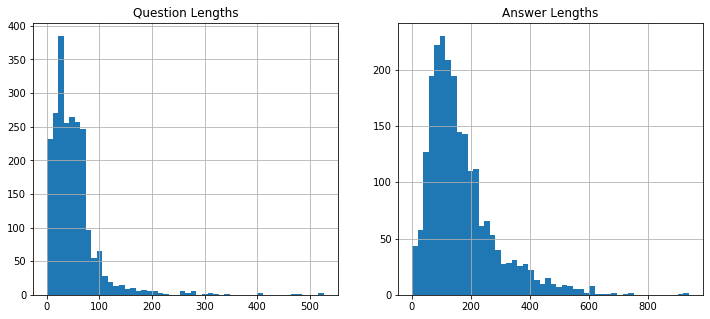

In [9]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.hist(qu_lens, bins=50); ax1.set_title('Question Lengths'); ax1.grid()
ax2.hist(an_lens, bins=50); ax2.set_title('Answer Lengths'); ax2.grid()
plt.show()

In [10]:
len(df), df.questionTitle.nunique(), df.questionText.nunique(), df.answerText.nunique()

(2271, 890, 827, 2127)

### data structure

- many questions have multiple answers
- most answers are unique, but there are some duplicates

How many answers per question?

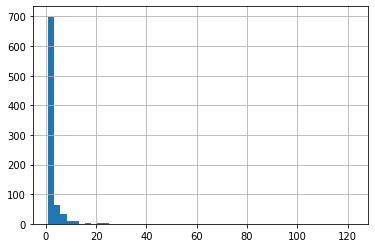

In [11]:
fig, ax = plt.subplots()
_ = ax.hist(df.groupby('questionText').size().values, bins=50)
ax.grid()

### observe some data

print('hello')

In [12]:
def print_sample():
    sample_qid = df.sample(1)['questionID'].iloc[0]
    qu_mask = df.questionID == sample_qid
    df_qu = df[qu_mask]
    print('QUESTION:')
    print(df_qu.iloc[0]['questionText'])
    for idx, row in df_qu.iterrows():
        print('\nANSWER:')
        print(row['answerText'])

In [13]:
# print_sample()

`print_sample()`

QUESTION:
My brother has been diagnosed with paranoid schizophrenia and has not been taking his medication. He's been using methamphetamine and alcohol and was found sleeping naked in my step mom driveway in 12 degree weather.
   I was adopted in by his dad (who just passed) and his mother will not Get involved because she's afraid of financial responsibility.    Do I have the rights to be able to sign my brother into mentalhealth facility?

ANSWER:
I'm sorry to hear that your brother has been having such a rough time. He's lucky to have you on his side (although he may not always see it that way).As far as whether you can sign him in, that depends on a lot of different things.I would suggest that you Google the state and county that you live in as well as some phrase similar to "crisis hotline." They can tell you how it works in that county. My guess is that you could sign him in as long as he met the criteria for admission at that moment, but I can't  be entirely sure. You could also ask the person on the phone about financial responsibility. I have not heard of that being a problem, but I guess it would depend on insurance.If you have trouble finding a local  hotline, consider calling the national crisis number (800-273-8255) and ask them to help you find someone local.

ANSWER:
Thanks for asking this question. I know it can be really difficult to deal with issues like this.To answer your question, you might be able to get you brother some mental health help, even if he doesn't recognize that he needs it. In most states, an individual can request a mental health evaluation of a family member if that family member poses a danger to themselves or someone else, or if they are unable to take care of their own basic needs.You can always call 911 if you are concerned about his immediate safety (for example if you find him sleeping outside in below freezing weather.  As an alternative to calling 911, you might also be able to request an evaluation from an authorized mental health provider.  The deatsils of who you would contact vary from state to state. Here's a link with some additional resources:http://www.treatmentadvocacycenter.org/someone-i-know-is-in-crisisHe's lucky to have a brother who cares for his wellbeing as much as you do.

ANSWER:
The answer depends on what State you live.Since the description you write here is that your brother may be a serious risk to himself and others, it is worth contacting a mental health hotline or one of your local area hospitals and talk to a social worker or other professional level person in their psychiatry department.  Ask the same question you posted here.   Your question is a good one and merits serious follow through.

ANSWER:
Hello, My heart goes out to you, your brother, and your family, dealing with a very painful and difficult situation. In New York, you can't institutionalize someone else directly. You can, however, call the police or EMS. If they agree that he would benefit from hospitalization (and it sounds like they would), he can be held in the hospital for up to 72 hours, whether he agrees or not. Some hospitals will not hold a person that long, in spite of what we might want. I have seen many patients in and out of hospitals countless times, and it has been my experience that it can be extremely difficult to hold a person long enough to achieve good stability and an appropriate after-care plan. Hospitals in NYC tend to take a "patch and release" approach more often than I would like. It's been my experience that family makes a difference. Assertive, knowledgeable, persistent family can improve the quality of your loved one's care. Hospitals are highly pressured to discharge people quickly but they can not discharge a homeless person without someplace to go. If your family is willing to accept your brother, that will be the path of least resistance for the hospital. If the family refuses, they will be forced to find another path for him. You can also pressure the hospital to refer to rehab after psychiatrically stablized (which may only take a few days) and that may give your brother more time to begin making clear-headed decisions. If your brother has a psychiatrist, that person should be actively involved. I had a patient patched-and-released three times, in spite of my advocacy and him literally begging to remain and stop his voices. We finally got a 90 day hospitalization because I strong-armed his psychiatrist into demanding that the hospital stabilize his patient.  If your brother has a history of non--compliance with oral medications, you can push the hospital for injection, which again will help your brother stay stable for longer. Best wishes to you and your family.

ANSWER:
Family members sometimes get Power of Attorney over vulnerable adults. If you had this, you could do something like that. I'm assuming that you don't, though. There are steps family members can take through the court system to get someone involuntarily committed, but it is a long process. I deal with situations like this everyday on the job. The only time an adult can be committed against their will is if they are deemed by the doctor (such as at an emergency room) to be a threat to self or others. For instance, if he had suicidal thoughts and a plan to carry out the action, or if he had homicidal thoughts against someone else and a plan to carry it out, he could be placed on a short hold, but these holds only last for a few days. This still isn't a long-term solution. An adult has the right to refuse treatment and the right to make their own choices, no matter how bad those choices are. If you have a way to get him to an ER whenever things like that happen, such as being found sleeping outside in 12 degree weather, it will help a lot. They may or may not do a short term commitment for treatment based on the situation that brings him to the ER, but it's a start. They can help set him up with appointments for psych and he can get on medications. You can help by taking him to appointments and making sure his medications get filled. However, you can't force him to take the meds, so this may be something that happens a lot. With enough of a paper trail of many ER visits and that sort of thing, you'll stand a better chance of getting a court appointed psych ward stay. Some tips about ER visits: Don't send him alone. Always go with him or have someone go with him, because you will be able to give the treatment team better insight into what's going on than he will. He may say everything's fine and he wants to leave, so they won't have any reason to keep him if that is the case. Go with him. If you do get Power of Attorney, take the paperwork with you when you go to the ER and to doctor's appointments because they aren't just going to take your word. They need to see the actual paperwork. Having it on file in their system isn't good enough because paperwork expires, etc. Take it with you at all times. You can also compile his medical records and that sort of thing to take with you so they can see a full history of what's going on.Keep in mind that if you do get Power of Attorney, this makes you his guardian and you have to take care of him. Otherwise, you can get reported for vulnerable adult abuse and neglect. In fact, your mom ignoring and not helping may already put her at risk of that because she is willingly doing nothing to help someone who clearly needs the help. She won't be financially responsible for the hospital or doctor bills, but should be held responsible for his safety. Someone should. There are group homes for people with schizophrenia. " Being responsible" for someone doesn't mean you have to pay their bills, it just means you are going to make sure they get the care they need. That care may be placement in a long-term care facility like a group home or a nursing home. Psych inpatient hospitals aren't long-term, so you do need to look into other long-term options. Psych inpatient stays are temporary and are to stabilize him, they're not where someone stays forever.Good luck, and keep up the good attitude! Work with his treatment team. Ask for a social worker. If they see family that is wanting to do the right thing and wanting to help, they'll help you even if it does take a while to get things sorted out. The worst thing any of you can do is NOT go to appointments and that sort of thing.


> It seems like since the "winter blues" happens to you every year it may also be impacting your quality of life and possibly relationships.

### How reliable is the `questionID` field?

In [14]:
df.groupby('questionID')['questionTitle'].nunique().to_frame(
    'num_questionTitles').groupby('num_questionTitles').size()

num_questionTitles
1    864
2     21
dtype: int64

In [15]:
df.groupby('questionID')['questionText'].nunique().to_frame(
    'num_questionTitles').groupby('num_questionTitles').size()

num_questionTitles
1    864
2     21
dtype: int64

Most `questionID`s map to a single `questionText`/`questionTitle`. It isn't perfect, but is reliable enough for now.

# TRAIN/TEST SPLIT

In [16]:
df.split.value_counts(dropna=False)

train    1963
val       185
test      123
Name: split, dtype: int64

# REFLECTION MINING

### first sentence

In [17]:
sent_split_regex = re.compile(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s')

In [18]:
df['first_an_sent'] = df.answerText.apply(lambda x: sent_split_regex.split(x)[0])

In [19]:
df[['answerText', 'first_an_sent']].sample(10)

,answerText,first_an_sent
1364,Do some self-reflecting as to what areas of your life you'd currently like to develop.The good news is you know how happiness feels.That you were able to create situations and dynamics which produ...,Do some self-reflecting as to what areas of your life you'd currently like to develop.The good news is you know how happiness feels.That you were able to create situations and dynamics which produ...
1857,"Since you are saying that you know that the thoughts are yours and your thinking of them in a different person's voice to make them easier for you to follow through on, it doesn't sound like it co...","Since you are saying that you know that the thoughts are yours and your thinking of them in a different person's voice to make them easier for you to follow through on, it doesn't sound like it co..."
536,"It sounds like you are feeling pretty overwhelmed with worry about being continuously monitored, with no privacy even in your own mind, and as if people are constantly saying things about you in w...","It sounds like you are feeling pretty overwhelmed with worry about being continuously monitored, with no privacy even in your own mind, and as if people are constantly saying things about you in w..."
254,"There are an infinite number of possibilities here. You included a lot of things that you don't have. Is there anyway that you can have some freedom for a few hours a week, at least? A lot of time...",There are an infinite number of possibilities here.
1159,Infidelity is common. In a largest study conducted to date about 10-15% of women and 20-25% of men admitted to being unfaithful while in a monogamous relationship. You are not alone and you can ge...,Infidelity is common.
2135,"There are never ""too many issues"" to be addressed in therapy. Most people come in with multiple issues they want to address. The wonderful thing about therapy, is that often, as one or more sign...","There are never ""too many issues"" to be addressed in therapy."
478,"Feelings of anxiety can be scary and sometimes we're not aware of the triggers that lead up to moments of anxiety, i. e., heart racing, sweaty palms, sweating, shortness of breath. It's important ...","Feelings of anxiety can be scary and sometimes we're not aware of the triggers that lead up to moments of anxiety, i."
964,You are right that his insecurities are at the root of the issue. You cannot change that for him. He will have to do the work to handle those emotions on his own. What you can do is reassure hi...,You are right that his insecurities are at the root of the issue.
1158,"The behaviors you describe are boundary violations. You can not change your spouse, but you can respond to his behaviors in ways that protect your boundaries and ensure your safety. This is very...",The behaviors you describe are boundary violations.
1969,"It sounds like you would like to let other people get close to you and at the same time you are finding yourself compelled to keep people at a distance. Often times, when we have difficulty trusti...",It sounds like you would like to let other people get close to you and at the same time you are finding yourself compelled to keep people at a distance.


In [20]:
df[['answerText', 'first_an_sent']].sample(10)

,answerText,first_an_sent
1004,"Have you tried counseling? Having PTSD from multiple abusive sexual experiences is very overwhelming for one to handle alone. You may need the guidance, experience and support of a professional ...",Have you tried counseling?
1906,Hello. The end of the counselor/client relationship is one of mutual respect and engagement. Counseling sessions can end for any number of reasons. Among them are the client's inability to make fo...,Hello.
1720,Love is not enough to keep a relationship together.The people need to get along happily too.Let's start with knowing more about your happiness in being with your partner.The frequent break ups hap...,Love is not enough to keep a relationship together.The people need to get along happily too.Let's start with knowing more about your happiness in being with your partner.The frequent break ups hap...
1867,"There are many possible answers here. It could be that she misses friends, that she felt safe in the other house (emotionally safe and comfortable), or dozens of other things. Will she talk about ...",There are many possible answers here.
589,"Would you feel more secure in conversations if instead of talking soon after meeting someone or entering a social situation, you simply listened attentively to the other people?This way you'd have...","Would you feel more secure in conversations if instead of talking soon after meeting someone or entering a social situation, you simply listened attentively to the other people?This way you'd have..."
503,"This answer could be very different depending on the fear, the degree of it, and what it connects to.I wonder the following:On a scale of 1 to 10, how upset, anxious, or scared to you get when you...","This answer could be very different depending on the fear, the degree of it, and what it connects to.I wonder the following:On a scale of 1 to 10, how upset, anxious, or scared to you get when you..."
1963,I understand the feeling of not being liked due to not having any responses on the sites you list.More than likely the non-response has less to do with liking you than w liking the way you write y...,I understand the feeling of not being liked due to not having any responses on the sites you list.More than likely the non-response has less to do with liking you than w liking the way you write y...
516,"I am so sorry to hear that you are struggling. It sounds like you've had a traumatic experience that has impacted your life in many ways. Without knowing much about your history, I wonder if the...",I am so sorry to hear that you are struggling.
2216,"Yes, feeling nervous for the first few or several sessions of therapy, is completely normal.Therapy is an unusual way to have a conversation with someone. The person is an expert in recognizing ...","Yes, feeling nervous for the first few or several sessions of therapy, is completely normal.Therapy is an unusual way to have a conversation with someone."
71,"It could be really helpful to see a counselor/therapist about your increasing depression/panic symptoms. Finding out the cause of depression/anxiety isn't always as straightforward as it seems, si...",It could be really helpful to see a counselor/therapist about your increasing depression/panic symptoms.


### "seems like" / "sounds like"

In [21]:
import re
seem_sounds_regex = re.compile(r'^.{0,50}?(?:seems\slike)|(?:sounds\slike)')

In [22]:
def extract_seems_sounds(s):
    sents = sent_split_regex.split(s)
    for sent in sents:
        match = seem_sounds_regex.match(sent.lower())
        if match is not None: return sent

In [23]:
df['seems_sounds_sents'] = df.answerText.apply(extract_seems_sounds)

In [24]:
df.seems_sounds_sents.isnull().value_counts()

True     2232
False      39
Name: seems_sounds_sents, dtype: int64

This method did not yield many new reflections. Only 35 out of 2k+. 

In [25]:
seems_sounds_mask = df.seems_sounds_sents.notnull()
df.loc[seems_sounds_mask, ['answerText', 'seems_sounds_sents']].sample(10)

,answerText,seems_sounds_sents
1769,I am sorry to hear of these troubles. I see a few issues here. I wonder why you were both trying to get pregnant when the relationship seemed troubled? Some people think that they can fix a broken...,It seems like this is something that she needs to decide since she is the one that keeps doing the leaving.
1469,"What you are describing is something psychologists have termed ""triangulation"" which is what happens when one family member will not talk to the one they have a problem with and goes to a third me...",They will be offended when it seems like you are choosing the other one's side or that you are not standing up for them like they think you should.
1439,Sounds like it is time to set some boundaries with your mom. You can do this by letting her know that you understand how she is feeling and you understand that she is under a tremendous amount of...,Sounds like it is time to set some boundaries with your mom.
1491,"It seems like you are going trough stages of grief, since the inability to see your father causes you similar feelings as if you had lost him. Perhaps you could send him letters expressing your f...","It seems like you are going trough stages of grief, since the inability to see your father causes you similar feelings as if you had lost him."
1704,Sounds like you are dealing with a lot within your self which is causing you great pain. I would suggest that first you get a full physical evaluation to make sure that you are ok physically. Th...,Sounds like you are dealing with a lot within your self which is causing you great pain.
209,"Teenage years are rough for anyone, and this is a time for self-discovery and experimentation. Having older parents can certainly pose challenges. Most kids feel like their parents don't understan...","It seems like you're looking for affirmation from them, looking for their approval and understanding."
113,"Thank you for sharing. It seems like since the ""winter blues"" happens to you every year it may also be impacting your quality of life and possibly relationships. What you report sounds like you ma...","It seems like since the ""winter blues"" happens to you every year it may also be impacting your quality of life and possibly relationships."
1263,"Hello, and thank you for your question. I am very sorry about this life-altering situation that both you and your boyfriend are going through. To be sure, this is a devastating and lonely road for...","By the sound of your main question, it seems like you have every intention to be there for your boyfriend during this difficult time."
184,"Sounds like signs of someone who is depressed.Since the person in question is your friend, offer your friendship to listen to any situations or feelings she has about herself and the way her life ...","Sounds like signs of someone who is depressed.Since the person in question is your friend, offer your friendship to listen to any situations or feelings she has about herself and the way her life ..."
582,Sounds like your panic is less about loosing the relationship you are in (which by the way doesn't sound like it's meeting YOUR need for connection) and more about being alone. Being with him is s...,Sounds like your panic is less about loosing the relationship you are in (which by the way doesn't sound like it's meeting YOUR need for connection) and more about being alone.


### construct a reflection for each example

Assume that the "seems like"/"sounds like" sentences are higher quality reflections than the first sentences.

In [26]:
df['reflection'] = df.first_an_sent

seems_sounds_mask = df.seems_sounds_sents.notnull()
df.loc[seems_sounds_mask, 'reflection'] = df.loc[seems_sounds_mask, 'seems_sounds_sents']

### post-process to alleviate tokenization errors

The sentence splitting breaks in some cases. For example, when there isn't a whitespace separating the ending of a sentence with the beginning of the next. This results in some very long reflections.

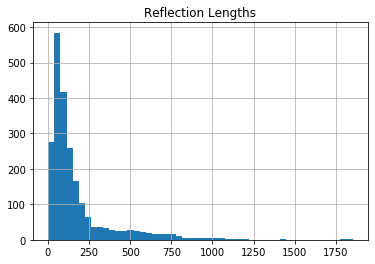

In [27]:
re_lens = df.reflection.apply(lambda x: len(x))

fig, ax = plt.subplots()
ax.hist(re_lens, bins=50); ax.set_title('Reflection Lengths'); ax.grid()
plt.show()

In [28]:
df.reflection = df.reflection.apply(lambda x: x[:250])

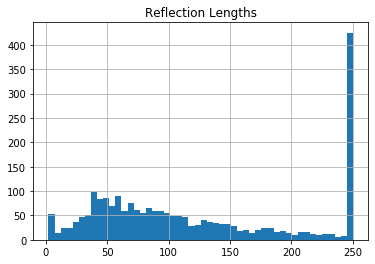

In [29]:
re_lens = df.reflection.apply(lambda x: len(x))

fig, ax = plt.subplots()
ax.hist(re_lens, bins=50); ax.set_title('Reflection Lengths'); ax.grid()
plt.show()